In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
df = pd.merge(ratings, movies, on='movieId')

In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [10]:
df.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [13]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [14]:
rating['n_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


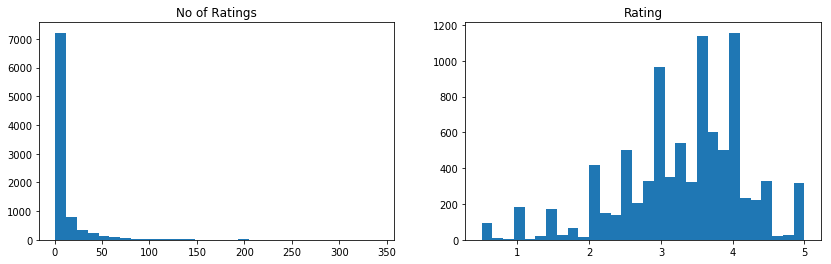

In [21]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))
ax1.set_title('No of Ratings')
ax1.hist(rating['n_ratings'], bins=30)

ax2.set_title('Rating')
ax2.hist(rating['rating'], bins=30);

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


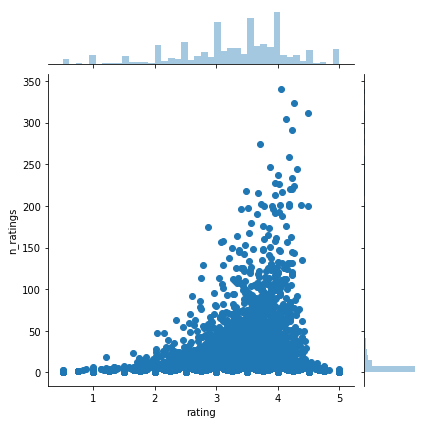

In [22]:
sns.jointplot(x='rating', y='n_ratings', data=rating);

In [26]:
rating_mat = pd.pivot_table(values='rating', index='userId', columns='title', data=df)

In [27]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
FG_user_ratings = rating_mat['Forrest Gump (1994)']
Matrix_user_ratings = rating_mat['Matrix, The (1999)']

In [29]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)
similar_to_Matrix = rating_mat.corrwith(Matrix_user_ratings)

/Users/sudeng/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/sudeng/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [30]:
corr_FG = pd.DataFrame(similar_to_FG, columns=['correlation'])
corr_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


In [32]:
corr_FG = corr_FG.dropna()
corr_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [33]:
corr_Matrix = pd.DataFrame(similar_to_Matrix, columns=['correlation'])
corr_Matrix = corr_Matrix.dropna()

In [34]:
corr_Matrix.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.056624
(500) Days of Summer (2009),0.368837
*batteries not included (1987),0.743955
...And Justice for All (1979),-0.610170


In [36]:
corr_Matrix.sort_values('correlation', ascending=False).head()

,correlation
title,
Project X (2012),1.0
Southland Tales (2006),1.0
Savages (2012),1.0
Escape from Alcatraz (1979),1.0
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",1.0


In [37]:
corr_Matrix = corr_Matrix.join(rating['n_ratings'])
corr_Matrix.head()

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13


In [39]:
corr_Matrix[corr_Matrix['n_ratings'] > 50].sort_values('correlation', ascending=False).head(10)

,correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200
Lethal Weapon (1987),0.437668,90
"Game, The (1997)",0.425481,76
Star Trek: First Contact (1996),0.421664,82
300 (2007),0.416096,59


In [40]:
corr_FG = corr_FG.join(rating['n_ratings'])
corr_FG[corr_FG['n_ratings'] > 50].sort_values('correlation', ascending=False).head(10)

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
Catch Me If You Can (2002),0.526390,99
Ghost (1990),0.517176,126
Gone in 60 Seconds (2000),0.503021,56
Mission: Impossible II (2000),0.501470,81


In [1]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook movie recommender system project.ipynb to html',
 '[NbConvertApp] Writing 345741 bytes to movie recommender system project.html']